# New York City Airbnb Data Analysis

Airbnb, Inc. is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California. 

Airbnb does not own any of the listed properties; instead, it profits by receiving commission from each booking. 
Airbnb is a shortened version of its original name, AirBedandBreakfast.com.

The company has been criticized for a direct correlation between increases in the number of its listings and increases in nearby rent prices, and creating nuisances for those living near leased properties.

The company is regulated by many jurisdictions, including the European Union and cities such as San Francisco and New York City.
It is viewed as a competitive threat by the hotel industry.

Dataset - [Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data)

In [282]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'font.size': 14})

In [283]:
airbnb_df = pd.read_csv('~/Downloads/AB_NYC_2019.csv')

airbnb = airbnb_df.copy()
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [284]:
airbnb.shape

(48895, 16)

In [285]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [286]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


- **Min price is 0 which is weird.**
- **minimum_nights max value is 1250.**

In [287]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

We can drop columns such as name, host_name, last_view as we wont be using those in our analysis.

We will use host_id to uniquely identify the hosts

In [288]:
airbnb.drop(['name','host_name','last_review'],axis=1,inplace=True)

we can set reviews_per_month to 0 for NA , if there are no reviews.

In [289]:
airbnb['reviews_per_month'].fillna(0,inplace=True)

In [290]:
airbnb.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Now lets drop rows having minimum_nights more than 365 days

In [291]:
airbnb.drop(airbnb[airbnb['minimum_nights'] > 365].index,inplace=True)

Data cleaning is done. Lets look at sample data and move further with data analysis

In [292]:
airbnb.sample(10)

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
12095,9396442,26347594,Manhattan,Upper West Side,40.77772,-73.98514,Private room,108,1,11,0.25,1,0
9259,7074504,37091023,Brooklyn,Park Slope,40.67102,-73.98080,Private room,100,1,1,0.02,1,0
5733,4174286,21660125,Brooklyn,Bushwick,40.69358,-73.91914,Private room,35,15,1,0.03,1,0
13540,10130925,51991283,Manhattan,Harlem,40.80057,-73.95468,Private room,179,1,2,0.05,5,309
11745,9132807,30283594,Manhattan,Midtown,40.75242,-73.97187,Entire home/apt,139,30,0,0.00,121,360
16897,13452474,16809858,Manhattan,Hell's Kitchen,40.76733,-73.98607,Entire home/apt,169,10,6,0.17,1,280
34660,27492304,207117606,Brooklyn,Windsor Terrace,40.65668,-73.97827,Private room,75,4,1,0.13,1,82
44706,34368774,42916011,Queens,Sunnyside,40.74368,-73.92421,Private room,88,8,0,0.00,2,363
13761,10356093,2321360,Brooklyn,Bedford-Stuyvesant,40.68580,-73.93465,Entire home/apt,120,2,0,0.00,1,0
3637,2186452,10636508,Manhattan,Tribeca,40.71725,-74.00528,Entire home/apt,1500,1,0,0.00,1,0


In [293]:
airbnb['neighbourhood'].value_counts()

Williamsburg          3918
Bedford-Stuyvesant    3713
Harlem                2656
Bushwick              2464
Upper West Side       1971
                      ... 
Richmondtown             1
Willowbrook              1
Fort Wadsworth           1
Rossville                1
New Dorp                 1
Name: neighbourhood, Length: 221, dtype: int64

In [294]:
airbnb['room_type'].value_counts()

Entire home/apt    25400
Private room       22322
Shared room         1159
Name: room_type, dtype: int64

## Analysis Tasks we will perform -

1) Neighbourhood group vs number of listings

2) Room type vs number of listings

3) Room type vs price

4) Neighbourhood group vs price

5) Room type vs availability(days)

6) host Id vs number of listings


### 1) Neighbourhood group vs no. of listings


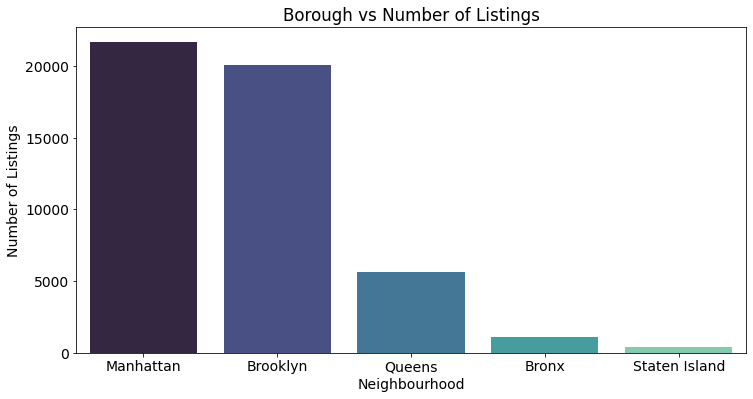

In [305]:
neighbourhood = airbnb['neighbourhood_group'].value_counts().reset_index()
neighbourhood.rename(columns={'index':'Neighbourhood','neighbourhood_group':'Number of Listings'},inplace=True)

plt.figure(figsize=(12, 6));
sns.barplot(neighbourhood['Neighbourhood'],neighbourhood['Number of Listings'],palette='mako');
plt.title('Borough vs Number of Listings');


### Looks like Manhattan and Brooklyn tops in the number of Airbnb listings

Lets drill down and look at neighbourhood group number of listing for each room type

In [296]:
neighbourhood = airbnb.groupby(['neighbourhood_group','room_type'])['id'].count().reset_index()
neighbourhood.rename(columns={'id':'Number of listings'},inplace=True)
neighbourhood_group = neighbourhood.pivot(index='neighbourhood_group',columns='room_type',values='Number of listings')

neighbourhood_group

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9557,10128,413
Manhattan,13194,7982,479
Queens,2094,3372,198
Staten Island,176,188,9


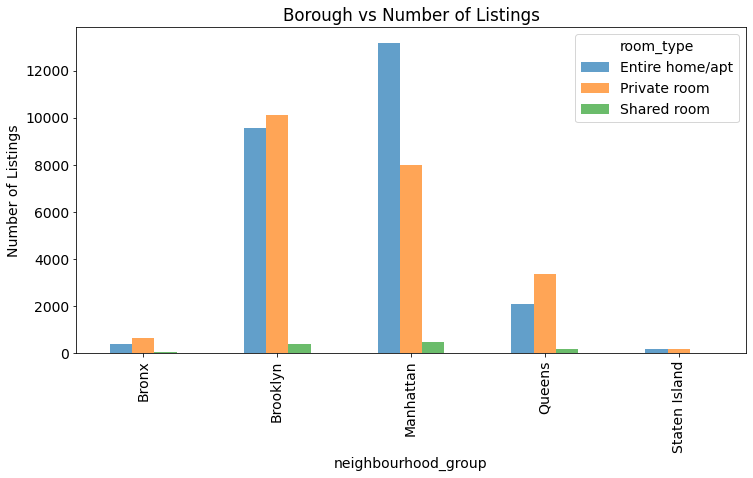

In [306]:
neighbourhood_group.plot(kind='bar',figsize=(12, 6),style="g",alpha=0.7);
plt.title('Borough vs Number of Listings');
plt.ylabel('Number of Listings');

### As you can see in the above plot, Manhattan and Brooklyn has high number of Entire Home/Apt and Private room.

## 2) Room Type vs number of listings

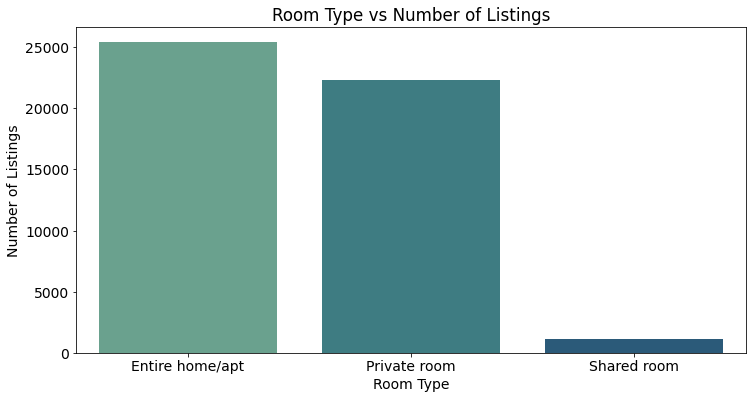

In [307]:
room_type = airbnb['room_type'].value_counts().reset_index()
room_type
room_type.rename(columns={'index':'Room Type','room_type':'Number of Listings'},inplace=True)

plt.figure(figsize=(12, 6));
sns.barplot(room_type['Room Type'],room_type['Number of Listings'],palette='crest');
plt.title('Room Type vs Number of Listings');

### Shared room has lowest number of listings than Entier home/apt and private rooms

## 3) Room Type vs price

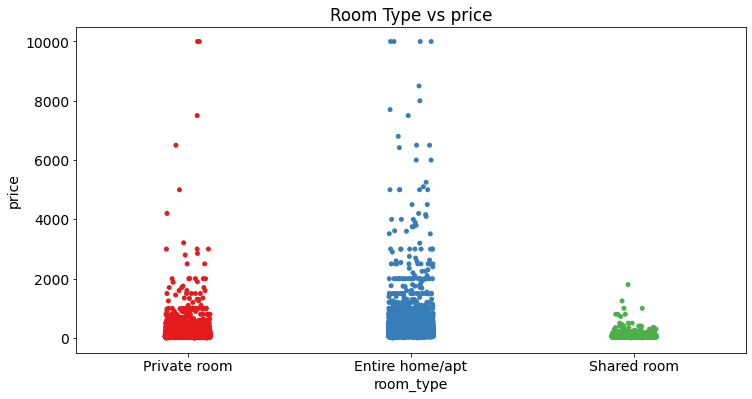

In [310]:
plt.figure(figsize=(12, 6));
sns.stripplot(x="room_type",y="price",data=airbnb,palette='Set1');
plt.title('Room Type vs price');

## 4) Neighbourhood group vs price

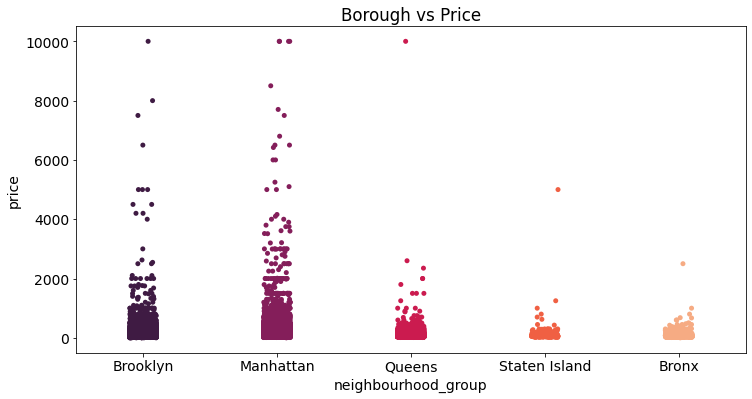

In [312]:
plt.figure(figsize=(12, 6));
sns.stripplot(x="neighbourhood_group",y="price",data=airbnb,palette='rocket');
plt.title('Borough vs Price');

### Clearly brooklyn and Manhattan are high priced neighbourhood in terms of Airbnb listing

## 5) Room Type vs Availability (days)

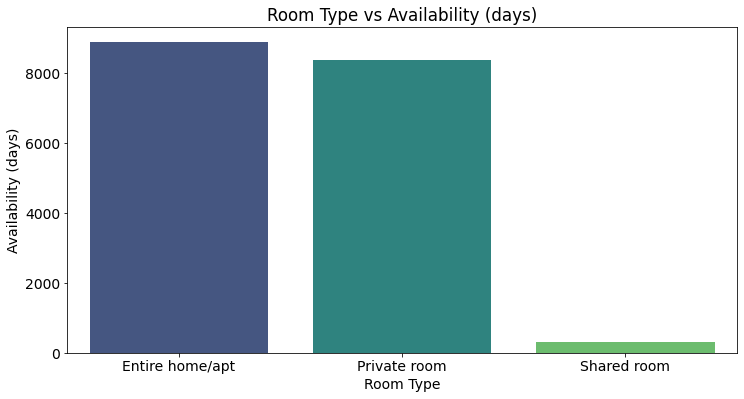

In [313]:
availability = airbnb.loc[airbnb['availability_365'] == 0]['room_type'].value_counts().reset_index()
availability.rename(columns={'index':'Room Type','room_type':'Availability (days)'},inplace=True)

plt.figure(figsize=(12, 6));
sns.barplot(availability['Room Type'],availability['Availability (days)'],palette='viridis');
plt.title('Room Type vs Availability (days)');


### As you can see Entire Home/apt and private rooms are booked most of the time

## 6) host_id vs number of listings


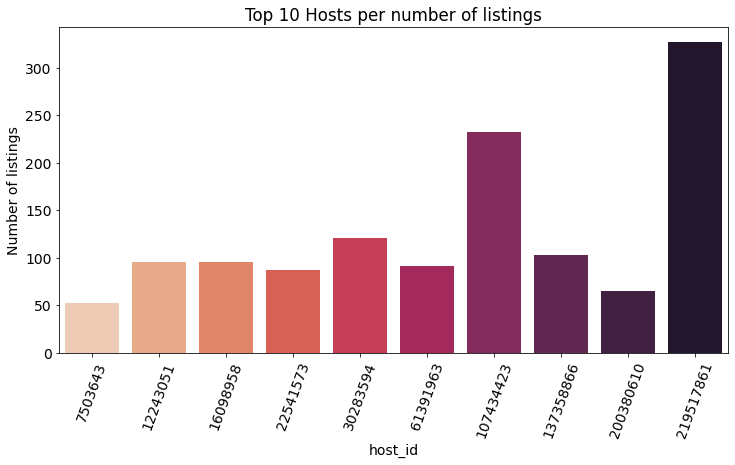

In [317]:
hosts = airbnb.groupby(['host_id'])['id'].count().sort_values(ascending=False).reset_index().head(10)
hosts.rename(columns={'id':'Number of listings'},inplace=True)

plt.figure(figsize=(12, 6));
sns.barplot(hosts['host_id'],hosts['Number of listings'],palette='rocket_r');
plt.title('Top 10 Hosts per number of listings');
plt.xticks(rotation=70);


## Lets analyze the shared rooms which have low listing numbers 

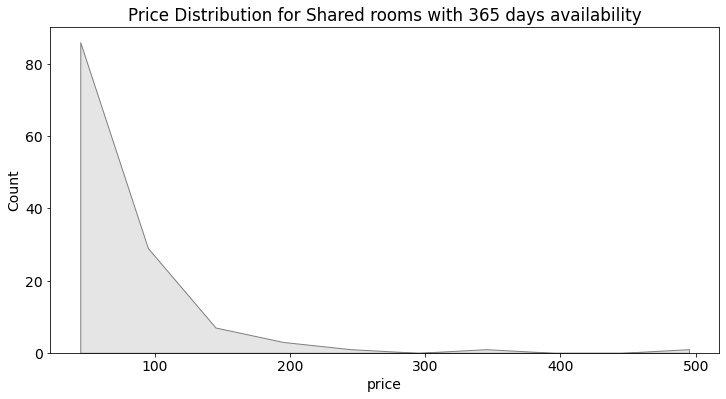

In [318]:
prices = airbnb.loc[(airbnb['room_type'] == 'Shared room') & (airbnb['availability_365'] == 365)]['price'].reset_index()

plt.figure(figsize=(12, 6));
sns.histplot(data=prices,x='price',binwidth=50,element="poly",color="gray",alpha=0.2);
plt.title('Price Distribution for Shared rooms with 365 days availability');

## Here we can see, even if prices are low the listing of room type shared room are not rented. Need to look on these listings, if there any issues with the listing